In [3]:
import pandas as pd
import matplotlib.pyplot as plt

# Mean, Media and STD

In [4]:
# Load CSV files into DataFrames
warrior_df = pd.read_csv('simulations_warrior.csv')
mage_df = pd.read_csv('simulations_mage.csv')
archer_df = pd.read_csv('simulations_archer.csv')
guardian_df = pd.read_csv('simulations_guardian.csv')

In [19]:
def save_last_params_for_all_simulations(class_df, class_name):
    """
    Function to save the parameters of the last generation for each simulation.
    
    Args:
        class_df (pd.DataFrame): DataFrame containing simulation data for multiple simulations of a class.
        class_name (str): Name of the class (e.g., Warrior, Mage, etc.).
    
    Returns:
        data_list (list): List of formatted parameter values for the last generation of each simulation.
    """
    # Create a list to store the formatted data for the last generation of each simulation
    data_list = []

    # Assuming there's a column 'Simulation' that identifies each simulation
    simulations = class_df['Simulation'].unique()  # Get all simulation IDs
    
    # Loop through each simulation
    for simulation in simulations:
        # Filter the DataFrame to get only the data for the current simulation
        sim_data = class_df[class_df['Simulation'] == simulation]
        
        # Identify the last generation for this simulation
        last_generation = sim_data['Generation'].max()
        
        # Filter the data to get only the last generation for this simulation
        last_gen_data = sim_data[sim_data['Generation'] == last_generation]
        
        # Iterate through the last generation and save the parameters
        for index, row in last_gen_data.iterrows():
            formatted_row = f"{int(row['Simulation'])},{int(row['Generation'])},{row['Best Fitness']:.4f},{row['Average Fitness']:.4f},{class_name}," \
                            f"{row['Strength']:.4f},{row['Agility']:.4f},{row['Expertise']:.4f},{row['Endurance']:.4f},{row['Health']:.4f}," \
                            f"{row['Height']:.4f},{int(row['Total Points'])},{row['Performance']:.4f}"
            
            # Append the formatted row to the list
            data_list.append(formatted_row)
    
    return data_list

# Example usage for Warrior class:
# Assuming the CSV has a 'Simulation' column to distinguish each simulation
warrior_df = pd.read_csv('simulations_warrior.csv')  # Load data for 100 simulations of Warrior class
warrior_last_gen_params = save_last_params_for_all_simulations(warrior_df, 'Warrior')

# Print the formatted data for the last generation of each simulation for Warriors
for data in warrior_last_gen_params:
    print(data)

1,8,44.6839,44.5095,Warrior,64.4249,53.0164,40.2806,6.0499,36.2281,1.9065,200,44.6839
2,6,55.8145,55.8145,Warrior,86.2001,56.6611,46.9092,2.9452,7.2844,1.9299,200,55.8145
3,2,46.3953,46.3168,Warrior,90.0220,53.8181,45.3588,10.4352,0.3659,1.4931,200,46.3953
4,8,52.1059,51.7006,Warrior,79.4396,69.7339,28.7923,3.1228,18.9113,1.8668,200,52.1059
5,4,56.6703,56.5126,Warrior,84.1016,60.2090,51.9587,0.1543,3.5765,1.8629,200,56.6703
6,2,50.8061,50.8061,Warrior,95.4748,53.1641,32.6877,10.5239,8.1495,1.8652,200,50.8061
7,2,54.1495,54.1495,Warrior,82.2410,71.1263,28.5568,13.4749,4.6010,1.9008,200,54.1495
8,11,48.3319,47.9394,Warrior,86.1566,80.0574,15.5043,15.2031,3.0785,1.9966,200,48.3319
9,2,55.8822,55.7579,Warrior,77.8901,69.4937,39.6332,3.8411,9.1418,1.9238,200,55.8822
10,2,52.8030,52.7984,Warrior,84.2560,64.8186,31.5023,12.8847,6.5385,1.9484,200,52.8030
11,2,49.2755,49.1527,Warrior,71.1116,59.1151,39.1188,3.9645,26.6899,1.9257,200,49.2755
12,6,53.5092,53.0150,Warrior,99.1079,77.4682,7.5012,14

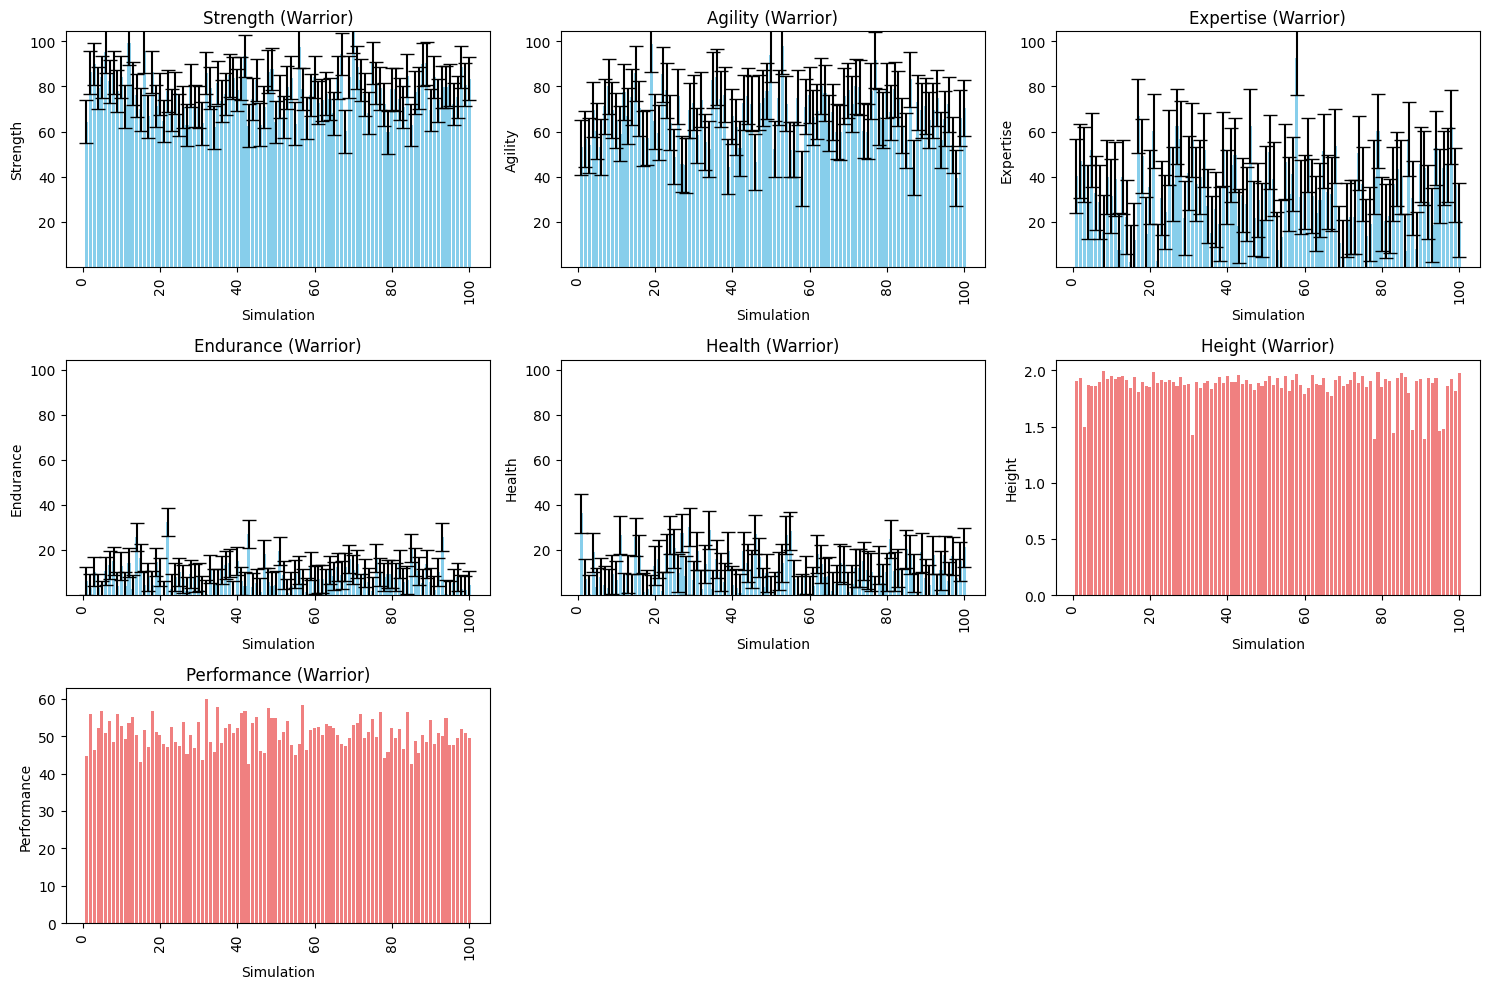

In [22]:
def save_last_params_for_all_simulations(class_df, class_name):
    """
    Function to save the parameters of the last generation for each simulation.
    
    Args:
        class_df (pd.DataFrame): DataFrame containing simulation data for multiple simulations of a class.
        class_name (str): Name of the class (e.g., Warrior, Mage, etc.).
    
    Returns:
        pd.DataFrame: DataFrame of parameter values for the last generation of each simulation.
    """
    # Create a list to store the formatted data for the last generation of each simulation
    data_list = []

    # Assuming there's a column 'Simulation' that identifies each simulation
    simulations = class_df['Simulation'].unique()  # Get all simulation IDs
    
    # Loop through each simulation
    for simulation in simulations:
        # Filter the DataFrame to get only the data for the current simulation
        sim_data = class_df[class_df['Simulation'] == simulation]
        
        # Identify the last generation for this simulation
        last_generation = sim_data['Generation'].max()
        
        # Filter the data to get only the last generation for this simulation
        last_gen_data = sim_data[sim_data['Generation'] == last_generation]
        
        # Iterate through the last generation and save the parameters
        for index, row in last_gen_data.iterrows():
            data_list.append({
                'Simulation': int(row['Simulation']),
                'Generation': int(row['Generation']),
                'Best Fitness': row['Best Fitness'],
                'Average Fitness': row['Average Fitness'],
                'Class': class_name,
                'Strength': row['Strength'],
                'Agility': row['Agility'],
                'Expertise': row['Expertise'],
                'Endurance': row['Endurance'],
                'Health': row['Health'],
                'Height': row['Height'],
                'Total Points': row['Total Points'],
                'Performance': row['Performance']
            })
    
    # Convert the list into a DataFrame
    return pd.DataFrame(data_list)

def plot_bar_charts_with_error_bars(df, class_name):
    """
    Function to create bar charts with error bars for the parameters in the DataFrame using subplots.
    
    Args:
        df (pd.DataFrame): DataFrame containing the last generation parameters.
        class_name (str): The class name for the plot title.
    """
    parameters = ['Strength', 'Agility', 'Expertise', 'Endurance', 'Health']
    performance_params = ['Height', 'Performance']

    # Calculate means and standard deviations for parameters to use for error bars
    means = df[parameters].mean()
    std_devs = df[parameters].std()

    # Create subplots (3 rows and 3 columns)
    fig, axes = plt.subplots(nrows=3, ncols=3, figsize=(15, 10))
    axes = axes.flatten()  # Flatten axes for easier indexing

    # Set a common Y-axis range for Strength, Agility, Expertise, Endurance, and Health
    min_y = min(df[parameters].min())
    max_y = max(df[parameters].max())

    # Plot a bar chart with error bars for Strength, Agility, Expertise, Endurance, and Health
    for idx, param in enumerate(parameters):
        axes[idx].bar(df['Simulation'], df[param], yerr=std_devs[param], capsize=5, color='skyblue')
        axes[idx].set_xlabel('Simulation')
        axes[idx].set_ylabel(param)
        axes[idx].set_title(f'{param} ({class_name})')
        axes[idx].tick_params(axis='x', rotation=90)
        axes[idx].set_ylim(min_y, max_y)  # Set the same Y-axis range for comparison

    # Plot for Height and Performance (with individual Y-axes)
    for i, param in enumerate(performance_params, start=len(parameters)):
        axes[i].bar(df['Simulation'], df[param], color='lightcoral')
        axes[i].set_xlabel('Simulation')
        axes[i].set_ylabel(param)
        axes[i].set_title(f'{param} ({class_name})')
        axes[i].tick_params(axis='x', rotation=90)

    # Remove any extra subplots if there are any
    if len(parameters) + len(performance_params) < len(axes):
        for i in range(len(parameters) + len(performance_params), len(axes)):
            fig.delaxes(axes[i])

    # Adjust layout to prevent overlap
    plt.tight_layout()
    plt.show()

# Example usage for Warrior class:
# Assuming the CSV has a 'Simulation' column to distinguish each simulation
warrior_df = pd.read_csv('simulations_warrior.csv')  # Load data for 100 simulations of Warrior class

# Save the last generation parameters for each simulation
warrior_last_gen_df = save_last_params_for_all_simulations(warrior_df, 'Warrior')

# Plot all the bar charts together with subplots and error bars for Warrior class
plot_bar_charts_with_error_bars(warrior_last_gen_df, 'Warrior')

In [18]:
def save_last_params_and_calculate_stats(class_df, class_name, output_csv):
    """
    Function to save the parameters of the last generation for each simulation,
    and calculate the mean, median, and standard deviation for each parameter.
    
    Args:
        class_df (pd.DataFrame): DataFrame containing simulation data for multiple simulations of a class.
        class_name (str): Name of the class (e.g., Warrior, Mage, etc.).
        output_csv (str): The output CSV file to save the stats (mean, median, std).
    
    Returns:
        None
    """
    # Create a list to store the formatted data for the last generation of each simulation
    data_list = []

    # Assuming there's a column 'Simulation' that identifies each simulation
    simulations = class_df['Simulation'].unique()  # Get all simulation IDs
    
    # Loop through each simulation
    for simulation in simulations:
        # Filter the DataFrame to get only the data for the current simulation
        sim_data = class_df[class_df['Simulation'] == simulation]
        
        # Identify the last generation for this simulation
        last_generation = sim_data['Generation'].max()
        
        # Filter the data to get only the last generation for this simulation
        last_gen_data = sim_data[sim_data['Generation'] == last_generation]
        
        # Iterate through the last generation and save the parameters
        for index, row in last_gen_data.iterrows():
            formatted_row = f"{int(row['Simulation'])},{int(row['Generation'])},{row['Best Fitness']:.4f},{row['Average Fitness']:.4f},{class_name}," \
                            f"{row['Strength']:.4f},{row['Agility']:.4f},{row['Expertise']:.4f},{row['Endurance']:.4f},{row['Health']:.4f}," \
                            f"{row['Height']:.4f},{int(row['Total Points'])},{row['Performance']:.4f}"
            
            # Append the formatted row to the list
            data_list.append(formatted_row)
    
    # Convert the formatted strings into a pandas DataFrame for analysis
    columns = ['Simulation', 'Generation', 'Best Fitness', 'Average Fitness', 'Class', 
               'Strength', 'Agility', 'Expertise', 'Endurance', 'Health', 'Height', 
               'Total Points', 'Performance']
    
    # Convert the list of formatted strings into a DataFrame by splitting the strings
    data = [row.split(',') for row in data_list]
    
    # Create a DataFrame and convert necessary columns to numeric values
    class_last_gen_df = pd.DataFrame(data, columns=columns)
    
    # Convert relevant columns to numeric (ignoring 'Class' and 'Simulation' columns)
    numeric_columns = ['Best Fitness', 'Average Fitness', 'Strength', 'Agility', 
                       'Expertise', 'Endurance', 'Health', 'Height', 'Performance']
    
    class_last_gen_df[numeric_columns] = class_last_gen_df[numeric_columns].apply(pd.to_numeric)
    
    # Calculate the mean, median, and standard deviation for the numeric columns
    mean_values = class_last_gen_df[numeric_columns].mean()
    median_values = class_last_gen_df[numeric_columns].median()
    std_values = class_last_gen_df[numeric_columns].std()
    
    # Create a DataFrame to hold the stats
    stats_df = pd.DataFrame({
        'Mean': mean_values,
        'Median': median_values,
        'Standard Deviation': std_values
    })
    
    # Save the stats to a CSV file
    stats_df.to_csv(output_csv)
    
    print(f"Statistics for {class_name} saved to {output_csv}")

# Read the data for each class and perform the calculations directly

# Example for Warrior class
warrior_df = pd.read_csv('simulations_warrior.csv')  # Load data for Warrior class
save_last_params_and_calculate_stats(warrior_df, 'Warrior', 'stats_warrior.csv')

# Example for Mage class
mage_df = pd.read_csv('simulations_mage.csv')  # Load data for Mage class
save_last_params_and_calculate_stats(mage_df, 'Mage', 'stats_mage.csv')

# Example for Archer class
archer_df = pd.read_csv('simulations_archer.csv')  # Load data for Archer class
save_last_params_and_calculate_stats(archer_df, 'Archer', 'stats_archer.csv')

# Example for Guardian class
guardian_df = pd.read_csv('simulations_guardian.csv')  # Load data for Guardian class
save_last_params_and_calculate_stats(guardian_df, 'Guardian', 'stats_guardian.csv')

Statistics for Warrior saved to stats_warrior.csv
Statistics for Mage saved to stats_mage.csv
Statistics for Archer saved to stats_archer.csv
Statistics for Guardian saved to stats_guardian.csv


# Fitness Comparison Across Classes

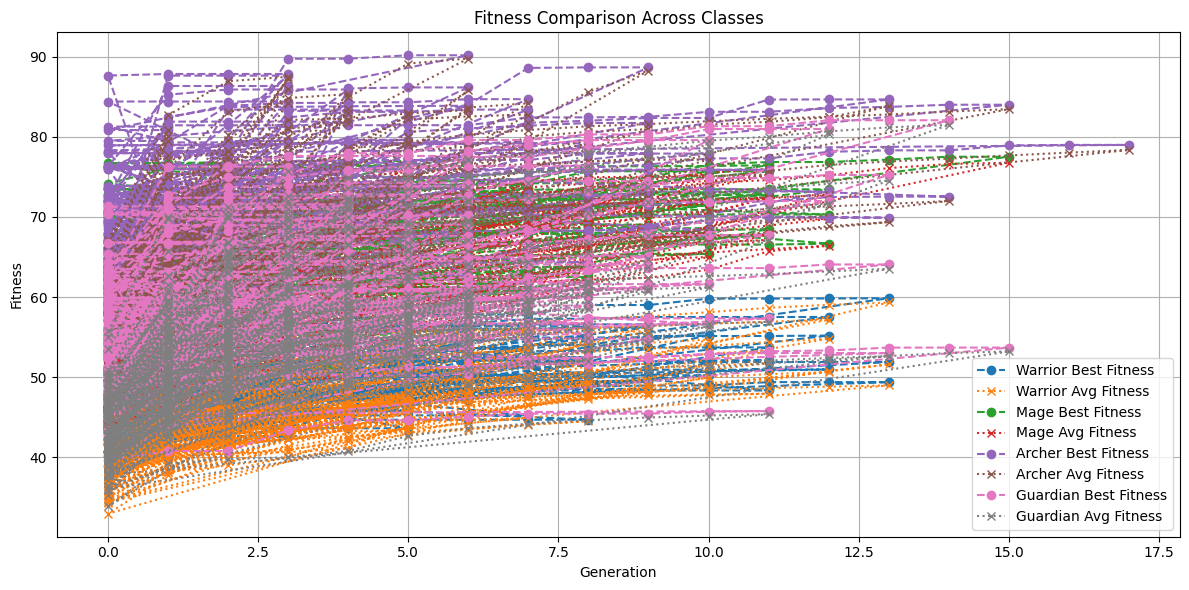

In [10]:
# Plot the fitness comparison for each class
def plot_fitness_comparison():
    plt.figure(figsize=(12, 6))

    # Plot for Warrior
    plt.plot(warrior_df['Generation'], warrior_df['Best Fitness'], label='Warrior Best Fitness', linestyle='--', marker='o')
    plt.plot(warrior_df['Generation'], warrior_df['Average Fitness'], label='Warrior Avg Fitness', linestyle=':', marker='x')

    # Plot for Mage
    plt.plot(mage_df['Generation'], mage_df['Best Fitness'], label='Mage Best Fitness', linestyle='--', marker='o')
    plt.plot(mage_df['Generation'], mage_df['Average Fitness'], label='Mage Avg Fitness', linestyle=':', marker='x')

    # Plot for Archer
    plt.plot(archer_df['Generation'], archer_df['Best Fitness'], label='Archer Best Fitness', linestyle='--', marker='o')
    plt.plot(archer_df['Generation'], archer_df['Average Fitness'], label='Archer Avg Fitness', linestyle=':', marker='x')

    # Plot for Guardian
    plt.plot(guardian_df['Generation'], guardian_df['Best Fitness'], label='Guardian Best Fitness', linestyle='--', marker='o')
    plt.plot(guardian_df['Generation'], guardian_df['Average Fitness'], label='Guardian Avg Fitness', linestyle=':', marker='x')

    plt.xlabel('Generation')
    plt.ylabel('Fitness')
    plt.title('Fitness Comparison Across Classes')
    plt.legend()
    plt.grid(True)
    plt.tight_layout()
    plt.show()

plot_fitness_comparison()

# Rate of Convergence

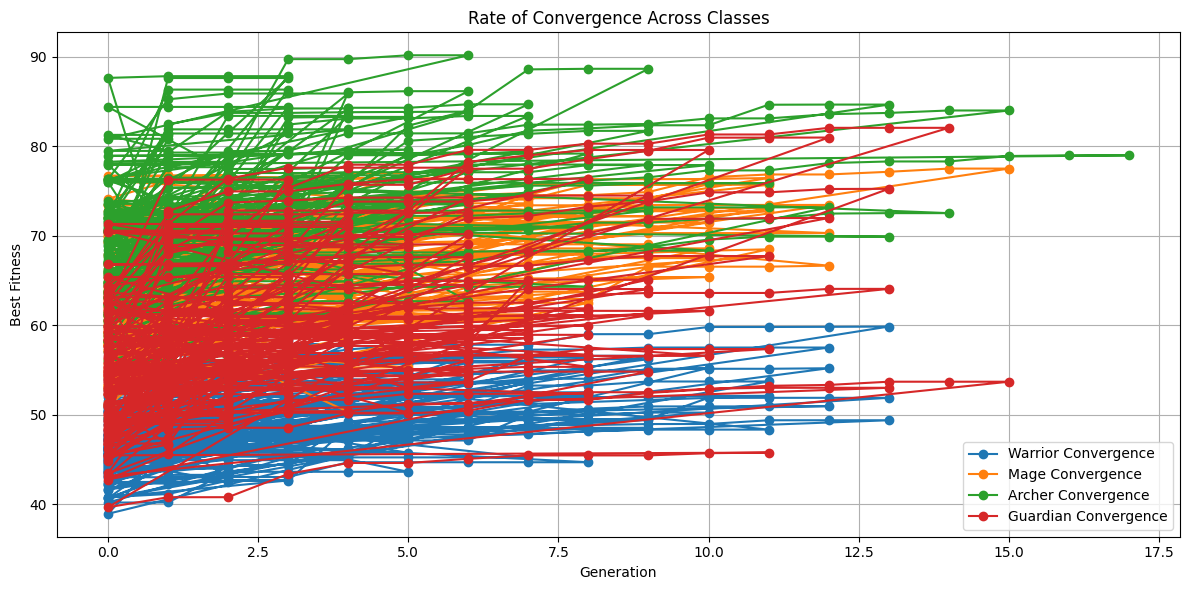

In [4]:
def plot_convergence_rate():
    plt.figure(figsize=(12, 6))

    # Warrior Convergence
    plt.plot(warrior_df['Generation'], warrior_df['Best Fitness'], label='Warrior Convergence', linestyle='-', marker='o')

    # Mage Convergence
    plt.plot(mage_df['Generation'], mage_df['Best Fitness'], label='Mage Convergence', linestyle='-', marker='o')

    # Archer Convergence
    plt.plot(archer_df['Generation'], archer_df['Best Fitness'], label='Archer Convergence', linestyle='-', marker='o')

    # Guardian Convergence
    plt.plot(guardian_df['Generation'], guardian_df['Best Fitness'], label='Guardian Convergence', linestyle='-', marker='o')

    plt.xlabel('Generation')
    plt.ylabel('Best Fitness')
    plt.title('Rate of Convergence Across Classes')
    plt.legend()
    plt.grid(True)
    plt.tight_layout()
    plt.show()

plot_convergence_rate()

# Exploration vs. Exploitation

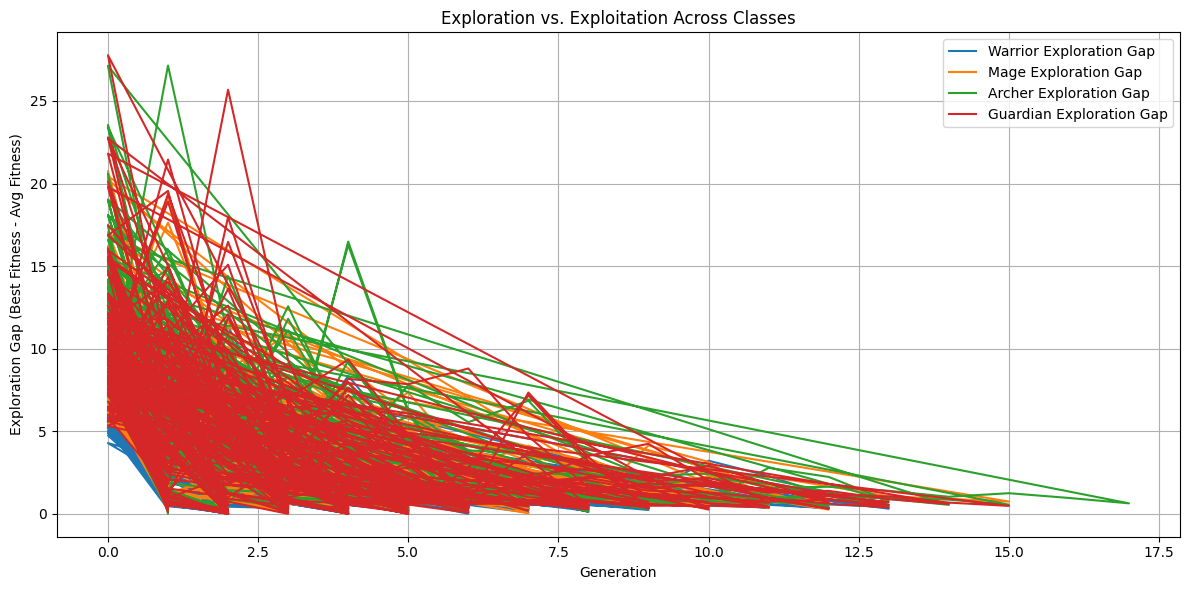

In [5]:
def plot_exploration_vs_exploitation():
    plt.figure(figsize=(12, 6))

    # Calculate and plot the difference between best and average fitness for each class
    warrior_df['Exploration Gap'] = warrior_df['Best Fitness'] - warrior_df['Average Fitness']
    mage_df['Exploration Gap'] = mage_df['Best Fitness'] - mage_df['Average Fitness']
    archer_df['Exploration Gap'] = archer_df['Best Fitness'] - archer_df['Average Fitness']
    guardian_df['Exploration Gap'] = guardian_df['Best Fitness'] - guardian_df['Average Fitness']

    plt.plot(warrior_df['Generation'], warrior_df['Exploration Gap'], label='Warrior Exploration Gap')
    plt.plot(mage_df['Generation'], mage_df['Exploration Gap'], label='Mage Exploration Gap')
    plt.plot(archer_df['Generation'], archer_df['Exploration Gap'], label='Archer Exploration Gap')
    plt.plot(guardian_df['Generation'], guardian_df['Exploration Gap'], label='Guardian Exploration Gap')

    plt.xlabel('Generation')
    plt.ylabel('Exploration Gap (Best Fitness - Avg Fitness)')
    plt.title('Exploration vs. Exploitation Across Classes')
    plt.legend()
    plt.grid(True)
    plt.tight_layout()
    plt.show()

plot_exploration_vs_exploitation()

# Class-Specific Performance (Attribute Impact)

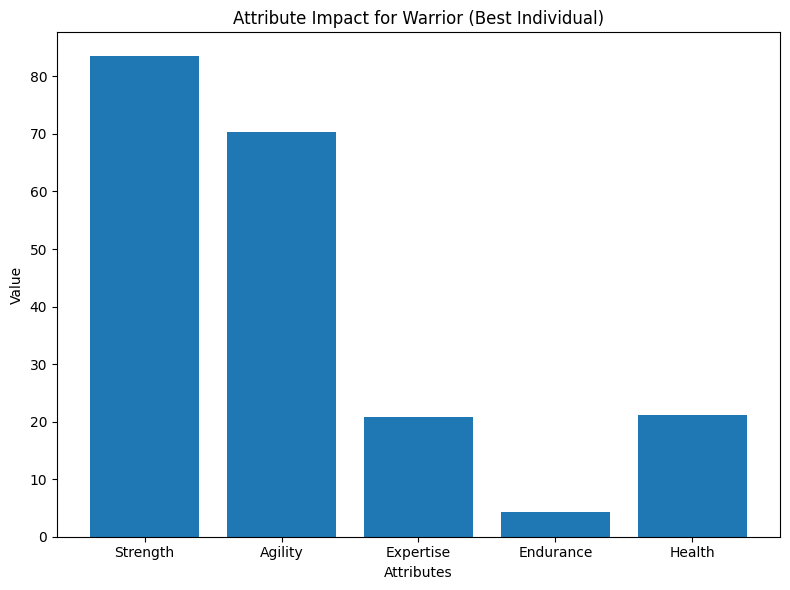

In [6]:
def plot_attribute_impact(class_df, class_name):
    # Extract the last generation's best individual attributes
    last_gen = class_df.iloc[-1]
    attributes = ['Strength', 'Agility', 'Expertise', 'Endurance', 'Health']
    values = [last_gen['Strength'], last_gen['Agility'], last_gen['Expertise'], last_gen['Endurance'], last_gen['Health']]

    plt.figure(figsize=(8, 6))
    plt.bar(attributes, values)
    plt.title(f'Attribute Impact for {class_name} (Best Individual)')
    plt.xlabel('Attributes')
    plt.ylabel('Value')
    plt.tight_layout()
    plt.show()

# Example: Plot attribute impact for Warrior
plot_attribute_impact(warrior_df, 'Warrior')
# Similarly, you can do it for Mage, Archer, Guardian:
# plot_attribute_impact(mage_df, 'Mage')
# plot_attribute_impact(archer_df, 'Archer')
# plot_attribute_impact(guardian_df, 'Guardian')

# Cross-Comparison of Evolution Strategies

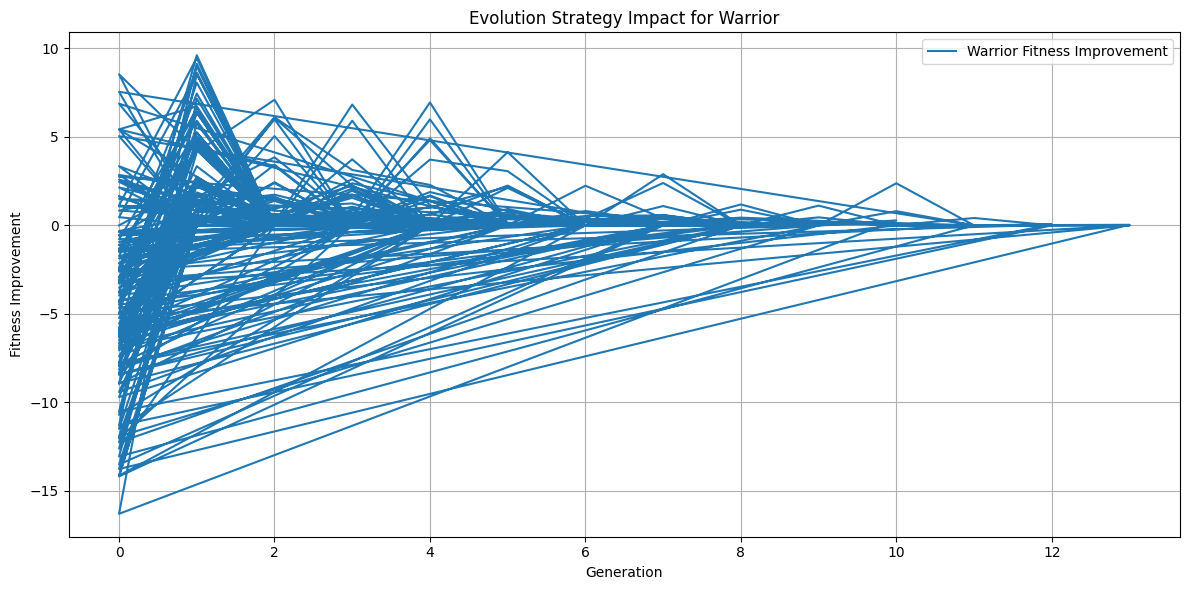

In [7]:
def strategy_impact_analysis(class_df, class_name):
    # Compute average fitness improvement over generations
    class_df['Fitness Improvement'] = class_df['Best Fitness'].diff().fillna(0)

    plt.figure(figsize=(12, 6))
    plt.plot(class_df['Generation'], class_df['Fitness Improvement'], label=f'{class_name} Fitness Improvement')
    
    plt.xlabel('Generation')
    plt.ylabel('Fitness Improvement')
    plt.title(f'Evolution Strategy Impact for {class_name}')
    plt.legend()
    plt.grid(True)
    plt.tight_layout()
    plt.show()

# Example: Analyze strategy impact for Warrior
strategy_impact_analysis(warrior_df, 'Warrior')
# Similarly, you can do it for Mage, Archer, Guardian:
# strategy_impact_analysis(mage_df, 'Mage')
# strategy_impact_analysis(archer_df, 'Archer')
# strategy_impact_analysis(guardian_df, 'Guardian')